In [128]:
%pylab notebook
from glob import glob

def draw(gid, x_o=0, y_o=0):
    ''' draw a glyp at certain position '''
    gg = glyphs[gid]

    l = gg[0]
    r = gg[1]
    w = r - l
    
    xx = gg[0::2][1:].astype(float)
    yy = gg[1::2][1:].astype(float)
    
    g_inds = (xx == -50) & (yy == 0)
    xx[g_inds] = nan
    yy[g_inds] = nan
    
    plot(xx + x_o, -yy + y_o, '-')
    return r

def expand_range(mm):
    ''' expand a font mapping containing ranges '''
    if type(mm) is str:
        mm = mm.replace('\n', ' ').split()
    mm_ = []
    for m in mm:
        if '-' in m:
            tmp = m.split('-')
            rr = range(int(tmp[0]), int(tmp[1]) + 1)
            mm_ += rr
        else:
            mm_.append(int(m))
    return mm_

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'draw']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Load hershey glyphs

In [131]:
with open('./hershey') as f:
    lines_ = f.readlines()

lines = []
for d in lines_:
    d = d.rstrip('\n')
    try:
        k = int(d[0:5])  # glyph id
        n = int(d[5:8])  # number of vertices
        lines.append(d)
    except ValueError:
        if len(d) > 0:
            lines[-1] += d
print(len(lines_), len(lines))

glyphs = {}
for d in lines:
    k = int(d[0:5])  # glyph id
    n = int(d[5:8])  # number of vertices
    tmp = [ord(c) - ord('R') for c in d[8:]]
    assert(len(tmp) == n * 2)
    glyphs[k] = array(tmp)

2324 1597


# Plot ALL glyphs

<IPython.core.display.Javascript object>


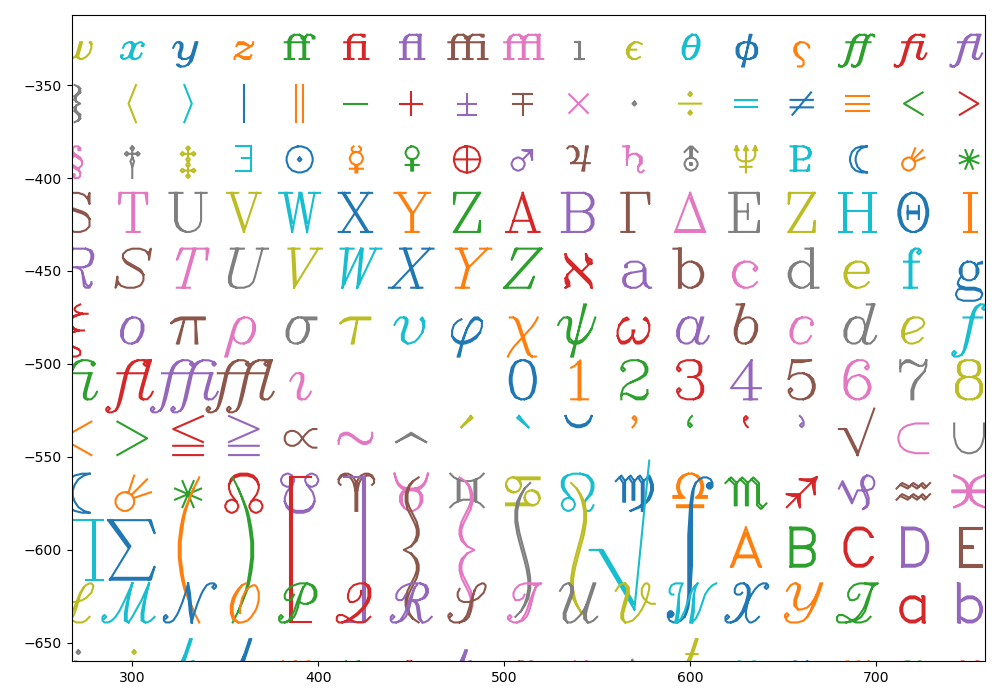

In [86]:
close('all')
figsize(10, 7)
axis('equal')

xp = 0
yp = 0
stp = 30
for k in sorted(glyphs.keys()):
    r = draw(k, xp, yp)
    xp += stp
    if (xp > stp * 48):
        xp = 0
        yp -= stp
tight_layout()

# Load all font mappings

In [282]:
maps = {}
for fn in glob("ascii-mapping/*.hmp"):
    with open(fn) as f:
        dat = expand_range(f.read(-1))
    fn_ = fn.split('/')[-1][:-4]
    maps[fn_] = dat

maps.keys()

dict_keys(['italict', 'romancs', 'romand', 'scriptc', 'romanp', 'romant', 'greekcs', 'romanc', 'italiccs', 'gothgrt', 'romans', 'greekp', 'cyrilc', 'gothgbt', 'italicc', 'greeks', 'scripts', 'greekc', 'gothitt'])

# Plot index sheets

<IPython.core.display.Javascript object>


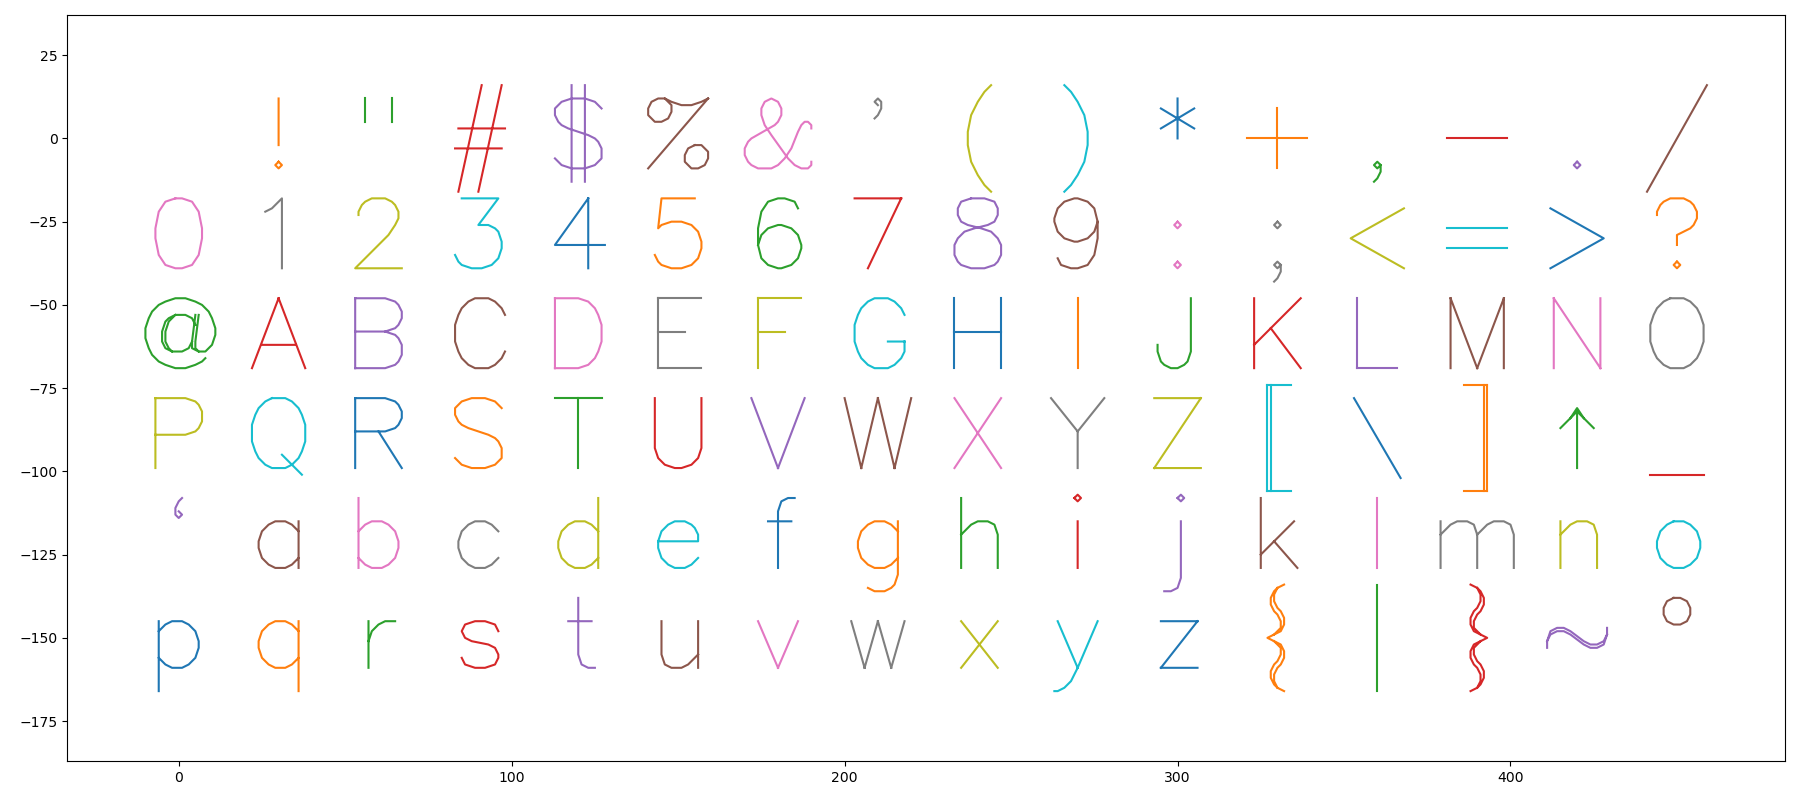

In [190]:
for m in maps.keys():
#     m = 'romans'
    figure()
    figsize(18, 8)
    axis('equal')
    tight_layout()

    xp = 0
    yp = 0
    stp = 30
    for k in maps[m]:
        r = draw(k, xp, yp)
        xp += stp
        if (xp >= stp * 16):
            xp = 0
            yp -= stp
#     break
    savefig(f'ascii-mapping/{m}.png')

# Too big glyphs for 6 bit

[906, 907, 1411, 2267, 2330, 2380, 2381, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412]


<IPython.core.display.Javascript object>


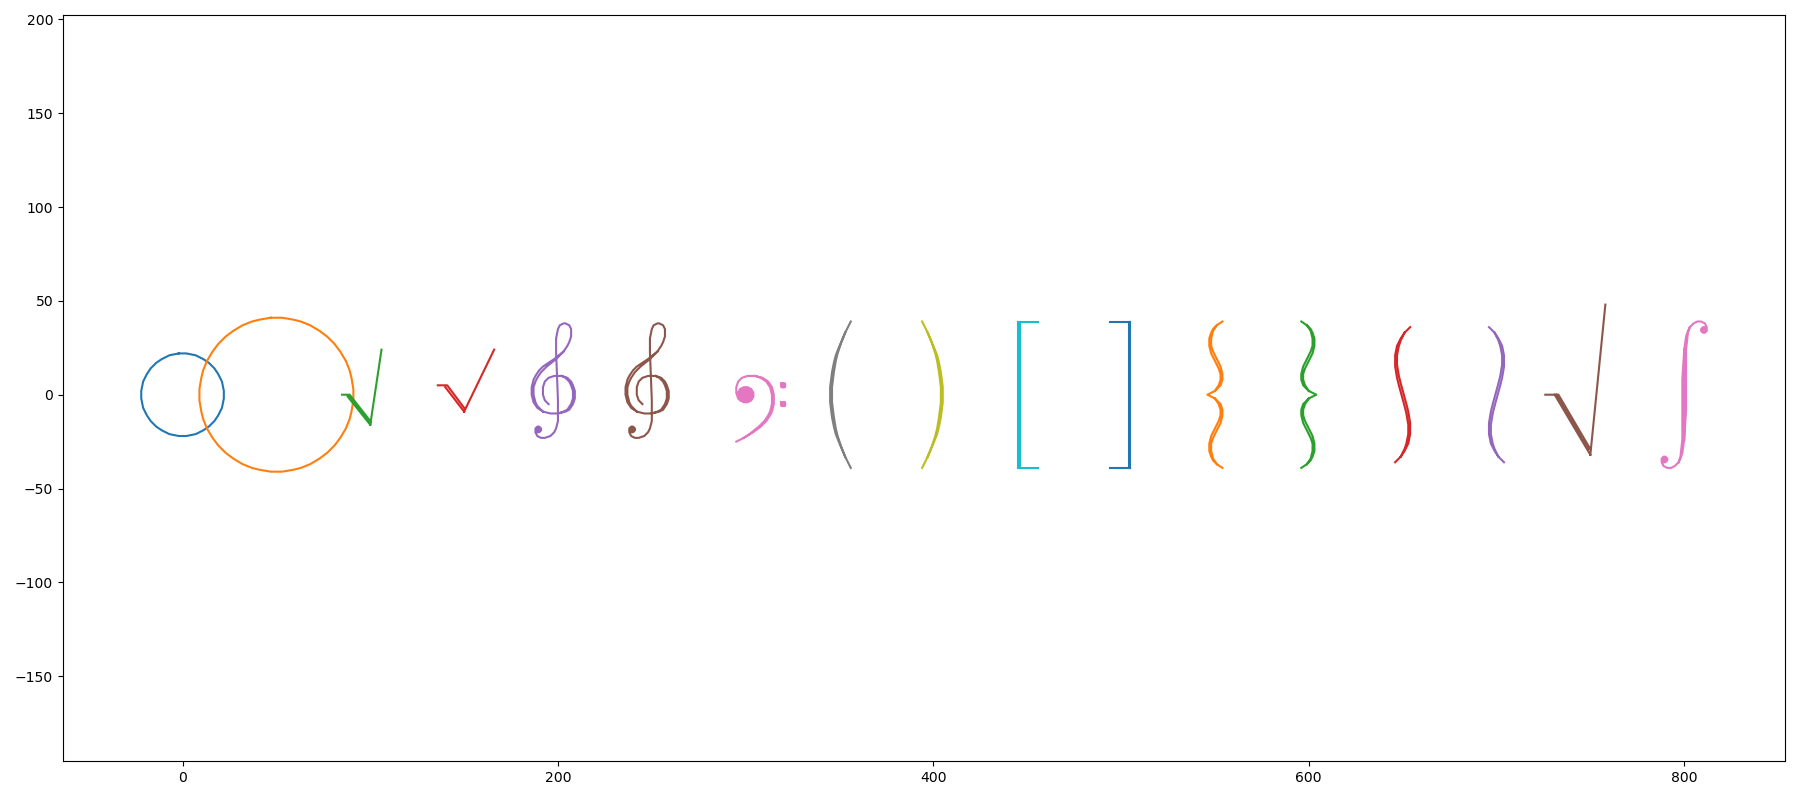

In [163]:
bgs = []
for k, v in glyphs.items():
    x = v.copy()
    x[x == -50] = 0
    if amax(x) > 21 or amin(x) < -20:
        bgs.append(k)
print(bgs)

close('all')
axis('equal')

xp = 0
yp = 0
stp = 50
for k in bgs:
    r = draw(k, xp, yp)
    xp += stp
    if (xp > stp * 16):
        xp = 0
        yp -= stp
tight_layout()

# C-code generation

In [278]:
def print_table(vals, w=24, w_v=3, f=None):
    ll = len(vals) - 1
    for i, g in enumerate(vals):
        if i > 0 and (i % w) == 0:
            print(file=f)
        print(f'{g:{w_v}d}', end='', file=f)
        if i < ll:
            print(',', end='', file=f)
    print('\n};\n', file=f)

def print_tables(name, f=None):
    all_glyphs = []
    g_lens = []
    for gid in maps[name]:
        all_glyphs += glyphs[gid].tolist()
        g_lens.append(len(glyphs[gid]))
    all_glyphs = array(all_glyphs, dtype=int8)

    print(f'static const int8_t h_{km}_glyphs[{len(all_glyphs)}] = {{', file=f)
    print_table(all_glyphs, 24, 3, f=f)

    g_inds = cumsum(g_lens)
    print(f'static const uint16_t h_{km}_inds[{len(g_inds)}] = {{', file=f)
    print_table(g_inds, 16, 5, f=f)

In [283]:
sorted(maps.keys())

['cyrilc',
 'gothgbt',
 'gothgrt',
 'gothitt',
 'greekc',
 'greekcs',
 'greekp',
 'greeks',
 'italicc',
 'italiccs',
 'italict',
 'romanc',
 'romancs',
 'romand',
 'romanp',
 'romans',
 'romant',
 'scriptc',
 'scripts']

In [287]:
to_export = [
#     'cyrilc',
    'gothgbt',
    'gothgrt',
    'gothitt',
#     'greekc',
#     'greekcs',
#     'greekp',
#     'greeks',
    'italicc',
    'italiccs',
    'italict',
    'romanc',
    'romancs',
    'romand',
    'romanp',
    'romans',
    'romant',
    'scriptc',
    'scripts'
]

In [291]:
with open("../src/hershey_data.c", 'w') as f:
    print('#include "hershey_data.h"\n', file=f)
    for km in to_export:
        print_tables(km, f=f)
        
with open("../src/hershey_data.h", 'w') as f:
    print('''\
#ifndef HERSHEY_DATA_H
#define HERSHEY_DATA_H
#include <stdint.h>
''', file=f)
    for km in sorted(maps.keys()):
        print(f'static const int8_t h_{km}_glyphs[];', file=f)
        print(f'static const uint16_t h_{km}_inds[];', file=f)        
        print(file=f)
    print('#endif', file=f)

lengt 2 means there is only the left and right value and nothing to draw, eg space

In [242]:
def get_inds(c):
    ''' generate the start and end indices into the glyph table '''
    if c <= 0:
        return 0, start_inds[0]
    return start_inds[c - 1], start_inds[c]